# Скринкаст интерполяция

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 100

df = pd.DataFrame()
## создаём N точек для оси времени
df['t'] = np.linspace(1, 360, N)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)

np.random.seed(42)

In [14]:
np.linspace(1, 360, N)

array([  1.        ,   4.62626263,   8.25252525,  11.87878788,
        15.50505051,  19.13131313,  22.75757576,  26.38383838,
        30.01010101,  33.63636364,  37.26262626,  40.88888889,
        44.51515152,  48.14141414,  51.76767677,  55.39393939,
        59.02020202,  62.64646465,  66.27272727,  69.8989899 ,
        73.52525253,  77.15151515,  80.77777778,  84.4040404 ,
        88.03030303,  91.65656566,  95.28282828,  98.90909091,
       102.53535354, 106.16161616, 109.78787879, 113.41414141,
       117.04040404, 120.66666667, 124.29292929, 127.91919192,
       131.54545455, 135.17171717, 138.7979798 , 142.42424242,
       146.05050505, 149.67676768, 153.3030303 , 156.92929293,
       160.55555556, 164.18181818, 167.80808081, 171.43434343,
       175.06060606, 178.68686869, 182.31313131, 185.93939394,
       189.56565657, 193.19191919, 196.81818182, 200.44444444,
       204.07070707, 207.6969697 , 211.32323232, 214.94949495,
       218.57575758, 222.2020202 , 225.82828283, 229.45

In [3]:
## готовим точки, которые будут пропущены в выборке
missing = np.random.randint(low=1, high=100, size=100)
missing

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75, 88, 24,  3, 22, 53,  2, 88,
       30, 38,  2, 64, 60, 21, 33, 76, 58, 22, 89, 49, 91, 59, 42, 92, 60,
       80, 15, 62, 62, 47, 62, 51, 55, 64,  3, 51,  7, 21, 73, 39, 18,  4,
       89, 60, 14,  9, 90, 53,  2, 84, 92, 60, 71, 44,  8, 47, 35, 78, 81,
       36, 50,  4,  2,  6, 54,  4, 54, 93, 63, 18, 90, 44, 34, 74, 62, 14,
       95, 48, 15, 72, 78, 87, 62, 40, 85, 80, 82, 53, 24, 26, 89])

In [7]:
np.unique(missing)

array([ 2,  3,  4,  6,  7,  8,  9, 14, 15, 18, 21, 22, 24, 26, 30, 33, 34,
       35, 36, 38, 39, 40, 42, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58,
       59, 60, 61, 62, 63, 64, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83,
       84, 85, 87, 88, 89, 90, 91, 92, 93, 95])

In [8]:
len(np.unique(missing))

61

In [9]:
## убираем часть данных из выборки
df.loc[missing, 'y'] = np.nan

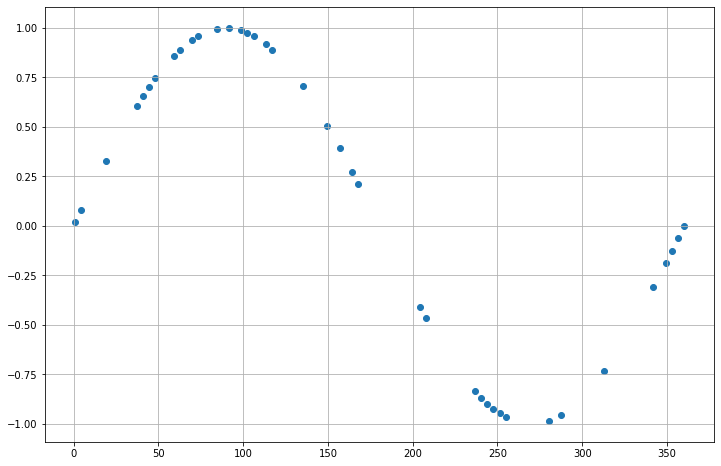

In [10]:
## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()

In [11]:
df

,t,y
0,1.000000,1.745241e-02
1,4.626263,8.065581e-02
2,8.252525,NaN
3,11.878788,NaN
4,15.505051,NaN
...,...,...
95,345.494949,NaN
96,349.121212,-1.887319e-01
97,352.747475,-1.262427e-01
98,356.373737,-6.324798e-02


In [12]:
df.shape

(100, 2)

In [13]:
df.isna().sum()

t     0
y    61
dtype: int64

In [15]:
df[~pd.isna(df.y)]

,t,y
0,1.000000,1.745241e-02
1,4.626263,8.065581e-02
5,19.131313,3.277343e-01
10,37.262626,6.054694e-01
11,40.888889,6.545942e-01
12,44.515152,7.010979e-01
13,48.141414,7.447941e-01
16,59.020202,8.573488e-01
17,62.646465,8.881883e-01
19,69.898990,9.390882e-01


# Интерполяция

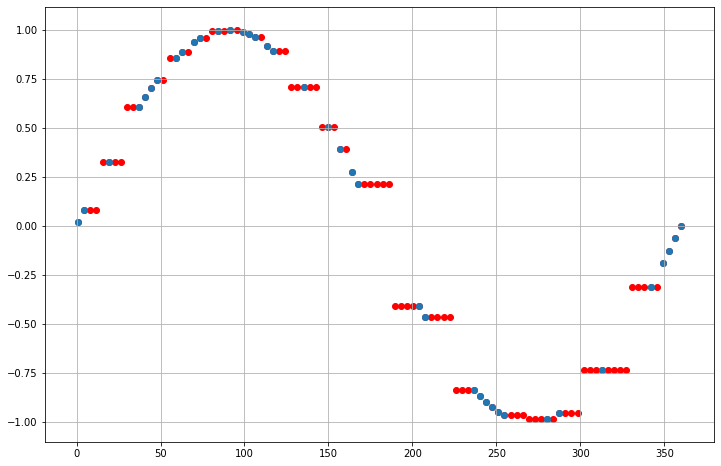

In [18]:
df['y_nearest'] = df.y.interpolate(method='nearest')
df['y_linear'] = df.y.interpolate(method='linear')
df['y_spline'] = df.y.interpolate(method='spline', order=5)

## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y_nearest, c='r')
#ax.scatter(df.t, df.y_linear, c='g', s=3)
#ax.scatter(df.t, df.y_spline, c='g', s=3)
ax.scatter(df.t, df.y)
ax.grid()

# Приведение к фиксированной сетке

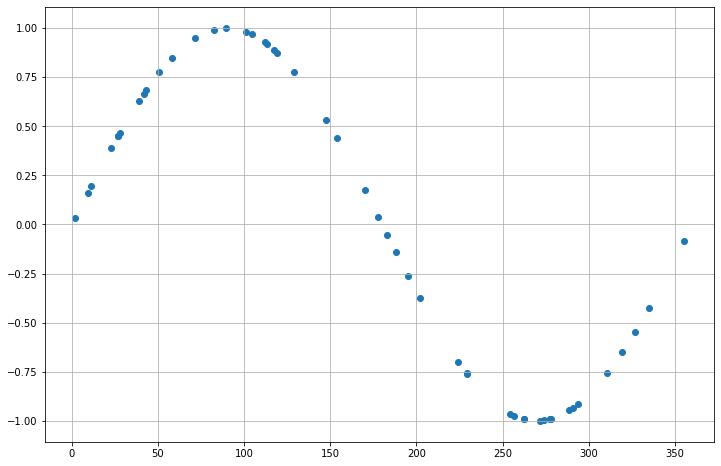

In [19]:
N = 360
df = pd.DataFrame()
## создаём 50 случайных точек для оси времени
df['t'] = N*np.random.rand(50)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)
df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()
plt.show()

In [20]:
df.head()

,t,y
8,1.987962,0.034690
34,9.150886,0.159035
36,11.314507,0.196194
19,22.881006,0.388819
13,26.656075,0.448634


In [21]:
df.isna().sum()

t    0
y    0
dtype: int64

In [22]:
## создаём регулярную сетку
ti = np.linspace(1, N, N)
print(ti)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

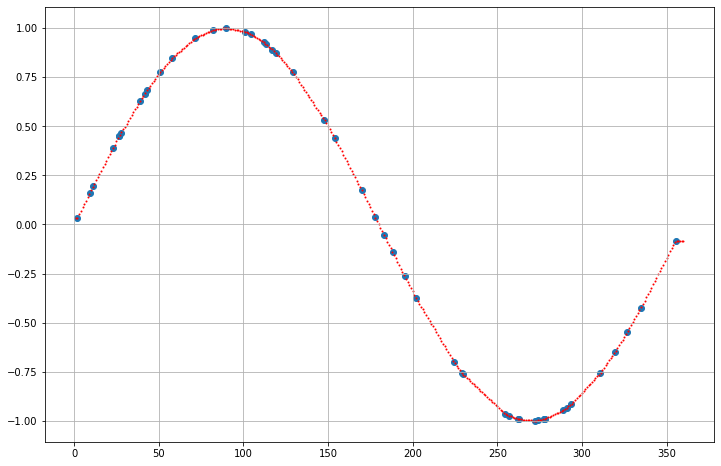

In [23]:
## создаём новый дейтафрейм для интерполированных значений
df_interp = pd.DataFrame()
df_interp['t'] = ti
## интерполируем значения исходного дейтафрейма на регулярной сетке
df_interp['y'] = np.interp(ti, df.t, df.y)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.scatter(df_interp.t, df_interp.y, marker='.', c='r', s=4)
ax.grid()
plt.show()

In [24]:
df_interp.head(50)

,t,y
0,1.0,0.034690
1,2.0,0.034898
2,3.0,0.052258
3,4.0,0.069618
4,5.0,0.086977
5,6.0,0.104337
6,7.0,0.121696
7,8.0,0.139056
8,9.0,0.156416
9,10.0,0.173618
